In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
%matplotlib inline

In [3]:
raw_data = pd.read_csv('Cust_Segmentation.csv')
raw_data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [6]:
raw_data_drop_address = raw_data.drop('Address', axis=1)
raw_data_drop_address.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [13]:
X = raw_data_drop_address.iloc[:,1:].values
X = np.nan_to_num(X)
scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)
X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modeling

In [16]:
k_means = KMeans(n_clusters=3,
    init='k-means++',
    n_init=15)
k_means.fit(X)
k_means.labels_

array([0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0,

In [17]:
raw_data_drop_address["cluster"] = k_means.labels_
raw_data_drop_address

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,0
846,847,28,2,7,34,0.359,2.021,0.0,7.0,0
847,848,25,4,0,18,2.802,3.210,1.0,33.4,2
848,849,32,1,12,28,0.116,0.696,0.0,2.9,0


In [29]:
raw_data_drop_address.iloc[:,1:].groupby(by=['cluster']).mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


### before cluster

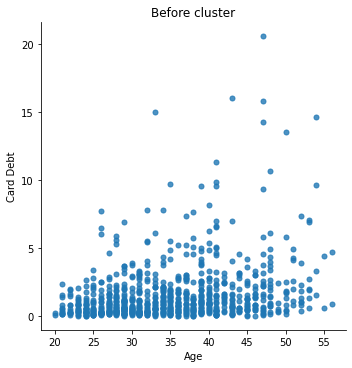

In [38]:
import seaborn as sns

sns.lmplot('Age', 'Card Debt', 
           data=raw_data, 
           fit_reg=False,  
           scatter_kws={"marker": "D", 
                        "s": 25})
# plt.scatter(raw_data['Age'], raw_data["Income"], h)
plt.title("Before cluster")
plt.xlabel("Age")
plt.ylabel("Card Debt")
plt.show()

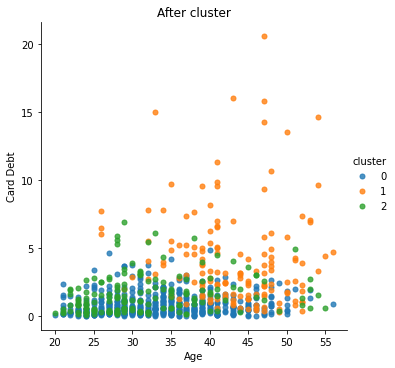

In [37]:
import seaborn as sns

sns.lmplot('Age', 'Card Debt', 
           data=raw_data_drop_address, 
           fit_reg=False,
           hue='cluster',
           scatter_kws={"marker": "D", 
                        "s": 25})
# plt.scatter(raw_data['Age'], raw_data["Income"], h)
plt.title("After cluster")
plt.xlabel("Age")
plt.ylabel("Card Debt")
plt.show()

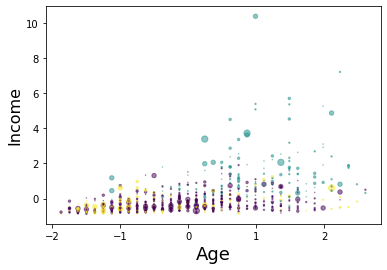

In [40]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()